In [22]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

In [23]:
df = pd.read_csv("LA_FINAL.csv")
df.head()
total_rows = df.count()


In [24]:
df.columns
max(total_rows)

26982

In [25]:
n=max(total_rows)
x = df['Income']

In [26]:
y=df['Score']

In [27]:
ir=IsotonicRegression()

In [28]:
y_ = ir.fit_transform(x, y)

In [29]:
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))


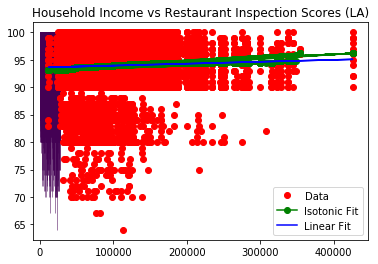

In [31]:
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Household Income vs Restaurant Inspection Scores (LA)')
plt.show()
fig.savefig('LA_graph.png')